Reinforcement Learning:
Like humans. Do and learn. Q-Learning is simple method



*   Environment
*   Agent-Explores environment
*   State
*   Action
*   Reward - Goal is to maximize reward

Q learning: rows --> state and column -->Action. So the value in the matrix refers to predicted reward for every state and action

OMGGGG AUTOMATAAA TOC

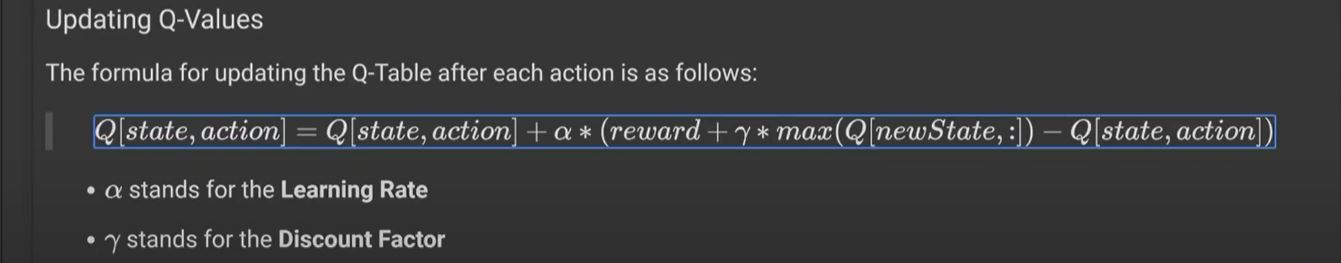

Q-Learning example. GYM

In [1]:
import gym  

In [11]:
env = gym.make('FrozenLake-v1')  

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
print(env.observation_space.n)   
print(env.action_space.n)   

16
4


In [5]:
env.reset() 

0

In [9]:
action = env.action_space.sample()  # get a random action 
print(action)

2


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
new_state, reward, done, info = env.step(action)  # take action

In [12]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [13]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
EPISODES = 2000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96


In [15]:
# Code block to introduce concept
epsilon = 0.9  # start with a 90% chance of picking a random action and 10% from Q table

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values - Maximum value in Q table

In [18]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [19]:
rewards = []
for episode in range(EPISODES): # for every episode

  state = env.reset() # reset the env
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action) # _ is info part which does not matter

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action]) # formula

    state = next_state

    if done: # Once the goal is reached
      rewards.append(reward)# append to reward. Everytime we get reward as 1 or 0
      epsilon -= 0.001 # Slowly reduce the epsilon value
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.02256785e-01 3.02198849e-02 2.39945985e-02 2.93896766e-02]
 [6.70392714e-03 1.95690761e-03 1.05007414e-02 1.90295492e-01]
 [1.45984223e-02 6.25563400e-03 1.00604539e-02 1.32085466e-01]
 [3.76698644e-03 2.48790119e-03 3.08636144e-03 9.68248217e-02]
 [1.32146781e-01 4.49638447e-04 2.03605423e-03 1.02846417e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.41927683e-05 7.38837609e-05 1.31660626e-01 2.58969485e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.07750433e-02 1.29467407e-02 2.19127194e-02 1.67576618e-01]
 [1.13051128e-02 4.48094026e-02 7.24804810e-03 4.66860458e-03]
 [3.44717581e-03 2.58984310e-03 1.12914635e-03 4.23988466e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11537828e-01 2.83788291e-02 6.54784336e-01 8.65537864e-02]
 [1.83691339e-01 9.90237594e-01 1.48993606e-01 1.76406502e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

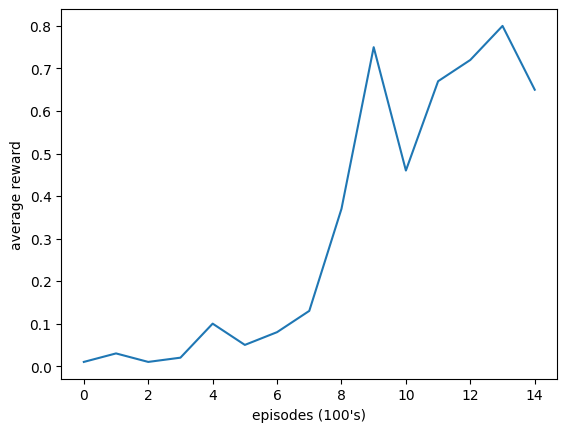

In [20]:
# plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()